세 가지 예제인 영화 리뷰 예측, 토픽 분류, 주택 가격 회귀 모두 홀드아웃 데이터에서 모델의 성능이 몇 번의 에포크 후에 최고치에 다다랐다가 감소되기 시작했습니다. 즉, 모델이 금방 훈련 데이터에 과대적합되기 시작합니다. 과대적합은 모든 머신 러닝 문제에서 발생합니다. 머신 러닝을 마스터하려면 과대적합을 다루는 방법을 꼭 배워야 합니다.

머신 러닝의 근본적인 이슈는 최적화와 일반화 사이의 줄다리기입니다. 최적화는 가능한 훈련 데이터에서 최고의 성능을 얻으려고 모델을 조정하는 과정입니다(머신 러닝의 학습). 반면 일반화는 훈련된 모델이 이전에 본 적 없는 데이터에서 얼마나 잘 수행되는지를 의미합니다. 물론 모델을 만드는 목적은 좋은 일반화 성능을 얻는 것입니다. 하지만 일반화 성능을 제어할 방법이 없습니다. 단지 훈련 데이터를 기반으로 모델을 조정할 수만 있습니다.

과대적합 해결
- 더 많은 훈련 데이터
- 정보의 양을 조절하거나 저장할 수 있는 정보에 제약
- 파리미터 수가 적은 모델 선택(단순한 모델)
- 훈련 데이터의 특성 수 축소
- 모델의 제약(특정 파라미터가 큰 값을 가지지 못하도록 함
- 훈련데이터의 잡음을 줄인다(오류데이터 수정하고 이상치 제거)

과소적합 해결
- 더 복잡한 모델 선택
- 훈련데이터의 특성을 더 선택
- 모델의 제약을 줄인다.


In [ ]:
from keras.datasets import imdb
import warnings
warnings.filterwarnings('ignore')
#num_words 는 만 개만 가져오겠다
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras import models,layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation ='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
   results = np.zeros((len(sequences),dimension))
   for  i ,sequence in enumerate(sequences):
          results[i,sequence]  = 1.
   return results
x_train = vectorize_sequences(train_data)
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [ ]:
x_test = vectorize_sequences(test_data)
x_test
y_train  =np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))
model.evaluate(x_test,y_test)

Epoch 1/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0224 - accuracy: 0.9972 - val_loss: 0.4411 - val_accuracy: 0.8746
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0160 - accuracy: 0.9983 - val_loss: 0.4738 - val_accuracy: 0.8693
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0129 - accuracy: 0.9985 - val_loss: 0.4868 - val_accuracy: 0.8729
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0102 - accuracy: 0.9991 - val_loss: 0.5114 - val_accuracy: 0.8724
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0081 - accuracy: 0.9994 - val_loss: 0.5330 - val_accuracy: 0.8724
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0064 - accuracy: 0.9996 - val_loss: 0.5612 - val_accuracy: 0.8693
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0049 - accuracy: 0.9997 - val_loss: 0.5882 - val_accuracy: 0.8691
Epoch 8/20
30

[1.0869792699813843, 0.8473600149154663]

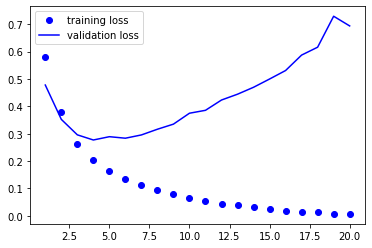

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss =history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label='training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.legend()
plt.show()


In [ ]:
#더 작은 네트워크로 변경
from tensorflow.keras import models,layers

model = models.Sequential()
model.add(layers.Dense(6,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(6,activation ='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
   results = np.zeros((len(sequences),dimension))
   for  i ,sequence in enumerate(sequences):
          results[i,sequence]  = 1.
   return results
x_train = vectorize_sequences(train_data)
x_train
x_test = vectorize_sequences(test_data)
x_test
y_train  =np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))
model.evaluate(x_test,y_test)

Epoch 1/20
30/30 [==============================] - 1s 31ms/step - loss: 0.5951 - accuracy: 0.7606 - val_loss: 0.5195 - val_accuracy: 0.8249
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4479 - accuracy: 0.8814 - val_loss: 0.4214 - val_accuracy: 0.8723
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3536 - accuracy: 0.9093 - val_loss: 0.3576 - val_accuracy: 0.8852
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2868 - accuracy: 0.9257 - val_loss: 0.3197 - val_accuracy: 0.8879
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2380 - accuracy: 0.9361 - val_loss: 0.2960 - val_accuracy: 0.8887
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2026 - accuracy: 0.9455 - val_loss: 0.2818 - val_accuracy: 0.8920
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1753 - accuracy: 0.9527 - val_loss: 0.2756 - val_accuracy: 0.8897
Epoch 8/20
30

[0.44547659158706665, 0.8628000020980835]

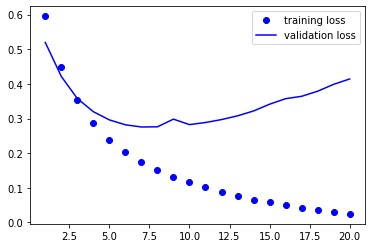

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss =history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label='training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.legend()
plt.show()

In [ ]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [ ]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(6, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [ ]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 38ms/step - loss: 0.4462 - acc: 0.8208 - val_loss: 0.3639 - val_acc: 0.8522
Epoch 2/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2528 - acc: 0.9106 - val_loss: 0.2851 - val_acc: 0.8870
Epoch 3/20
49/49 [==============================] - 1s 29ms/step - loss: 0.1969 - acc: 0.9299 - val_loss: 0.2875 - val_acc: 0.8849
Epoch 4/20
49/49 [==============================] - 1s 23ms/step - loss: 0.1656 - acc: 0.9414 - val_loss: 0.3129 - val_acc: 0.8767
Epoch 5/20
49/49 [==============================] - 1s 23ms/step - loss: 0.1421 - acc: 0.9492 - val_loss: 0.3155 - val_acc: 0.8783
Epoch 6/20
49/49 [==============================] - 1s 23ms/step - loss: 0.1222 - acc: 0.9577 - val_loss: 0.3360 - val_acc: 0.8748
Epoch 7/20
49/49 [==============================] - 1s 23ms/step - loss: 0.1084 - acc: 0.9629 - val_loss: 0.3603 - val_acc: 0.8719
Epoch 8/20
49/49 [==============================] - 1s 23ms/step - loss: 0.0916 - a

In [ ]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 31ms/step - loss: 0.5952 - acc: 0.6816 - val_loss: 0.5262 - val_acc: 0.8010
Epoch 2/20
49/49 [==============================] - 1s 23ms/step - loss: 0.4754 - acc: 0.8535 - val_loss: 0.4686 - val_acc: 0.8440
Epoch 3/20
49/49 [==============================] - 1s 22ms/step - loss: 0.4142 - acc: 0.9032 - val_loss: 0.4453 - val_acc: 0.8516
Epoch 4/20
49/49 [==============================] - 1s 23ms/step - loss: 0.3702 - acc: 0.9249 - val_loss: 0.4148 - val_acc: 0.8806
Epoch 5/20
49/49 [==============================] - 1s 23ms/step - loss: 0.3314 - acc: 0.9414 - val_loss: 0.3999 - val_acc: 0.8799
Epoch 6/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2951 - acc: 0.9514 - val_loss: 0.3908 - val_acc: 0.8769
Epoch 7/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2609 - acc: 0.9565 - val_loss: 0.4158 - val_acc: 0.8666
Epoch 8/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2240 - a

In [ ]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

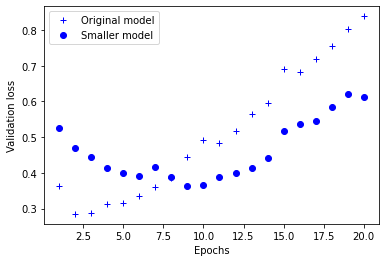

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [ ]:
from keras import models
from keras import layers

bigger_model = models.Sequential()
bigger_model.add(layers.Dense(1024, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(1024, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [ ]:
#모델 학습
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 18s 354ms/step - loss: 0.5355 - acc: 0.7816 - val_loss: 0.3778 - val_acc: 0.8284
Epoch 2/20
49/49 [==============================] - 17s 339ms/step - loss: 0.2227 - acc: 0.9130 - val_loss: 0.4033 - val_acc: 0.8383
Epoch 3/20
49/49 [==============================] - 17s 341ms/step - loss: 0.1228 - acc: 0.9564 - val_loss: 0.3443 - val_acc: 0.8857
Epoch 4/20
49/49 [==============================] - 17s 342ms/step - loss: 0.0558 - acc: 0.9837 - val_loss: 0.5153 - val_acc: 0.8798
Epoch 5/20
49/49 [==============================] - 17s 342ms/step - loss: 0.0959 - acc: 0.9856 - val_loss: 0.4909 - val_acc: 0.8847
Epoch 6/20
49/49 [==============================] - 17s 343ms/step - loss: 7.8552e-04 - acc: 1.0000 - val_loss: 0.6979 - val_acc: 0.8854
Epoch 7/20
49/49 [==============================] - 17s 341ms/step - loss: 0.1760 - acc: 0.9886 - val_loss: 0.6471 - val_acc: 0.8754
Epoch 8/20
49/49 [==============================] - 17s 340ms/ste

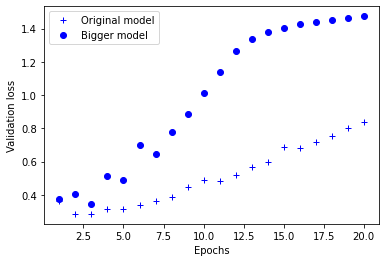

In [ ]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

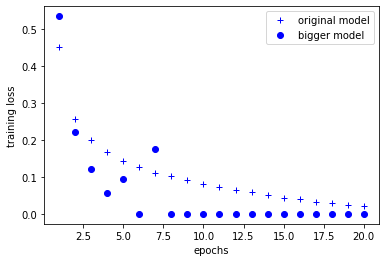

In [ ]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs,original_train_loss,'b+',label='original model')
plt.plot(epochs,bigger_model_train_loss,'bo',label='bigger model')
plt.xlabel('epochs')
plt.ylabel('training loss')

plt.legend()
plt.show()

용량이 큰 네트워크는 첫 번째 에포크 이후 거의 바로 과대적합이 시작되고 
검증 손실도 매우 불안정함   
훈련 손실이 매우 빠르게 0에 가까워짐. 용량이 많은 네트워크일수록 빠르게 훈련 데이터 모델링할 수 있음-> 과대적합에 민감해짐


In [ ]:
from keras import regularizers
l2_model = models.Sequential()
l2_model.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.001),
                          activation='relu',input_shape=(10000,)))
l2_model.add(layers.Dense(16,kernel_regularizer = regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1,activation='sigmoid'))
l2_model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
l2_model.hist = l2_model.fit(x_train,y_train,epochs=20,batch_size=512,validation_data=(x_test,y_test))


Epoch 1/20
49/49 [==============================] - 4s 61ms/step - loss: 0.5001 - acc: 0.8143 - val_loss: 0.3807 - val_acc: 0.8805
Epoch 2/20
49/49 [==============================] - 1s 28ms/step - loss: 0.3183 - acc: 0.9043 - val_loss: 0.3485 - val_acc: 0.8811
Epoch 3/20
49/49 [==============================] - 2s 32ms/step - loss: 0.2730 - acc: 0.9212 - val_loss: 0.3421 - val_acc: 0.8833
Epoch 4/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2529 - acc: 0.9284 - val_loss: 0.3428 - val_acc: 0.8815
Epoch 5/20
49/49 [==============================] - 1s 24ms/step - loss: 0.2403 - acc: 0.9321 - val_loss: 0.3506 - val_acc: 0.8791
Epoch 6/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2326 - acc: 0.9369 - val_loss: 0.3733 - val_acc: 0.8711
Epoch 7/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2226 - acc: 0.9416 - val_loss: 0.3578 - val_acc: 0.8795
Epoch 8/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2216 - a

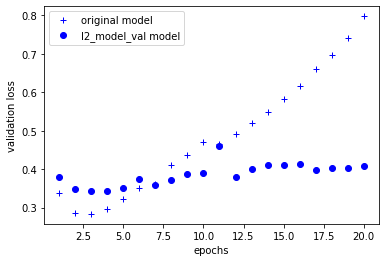

In [ ]:
l2_model_val_loss = l2_model.hist.history['val_loss']

plt.plot(epochs,original_val_loss,'b+',label='original model')
plt.plot(epochs,l2_model_val_loss,'bo',label='l2_model_val model')
plt.xlabel('epochs')
plt.ylabel('validation loss')
plt.legend()
plt.show()

규제를 가했을 때 과대적합에 잘 견디고 있음 

In [ ]:
from keras import regularizers
#l1 규제- 작은 값 삭제 
regularizers.l1(0.001)
#l1과 l2 규제 병행
regularizers.l1_l2(l1=0.001,l2=0.001)

## l1(0.0001) 모델과 비교

In [ ]:
l1_model = models.Sequential()
l1_model.add(layers.Dense(16,kernel_regularizer= regularizers.l1(0.0001),
                          activation='relu',input_shape=(10000,)))
l1_model.add(layers.Dense(16,kernel_regularizer= regularizers.l1(0.0001),
                          activation='relu'))
l1_model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',metrics=['acc'])
l1_model_hist = l1_model.fit(x_train,y_train,epochs=20,batch_size=512,validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 3s 41ms/step - loss: 0.5653 - acc: 0.8156 - val_loss: 0.4376 - val_acc: 0.8746
Epoch 2/20
49/49 [==============================] - 1s 25ms/step - loss: 0.3791 - acc: 0.8932 - val_loss: 0.3793 - val_acc: 0.8835
Epoch 3/20
49/49 [==============================] - 1s 25ms/step - loss: 0.3341 - acc: 0.9048 - val_loss: 0.3580 - val_acc: 0.8871
Epoch 4/20
49/49 [==============================] - 1s 25ms/step - loss: 0.3154 - acc: 0.9108 - val_loss: 0.3546 - val_acc: 0.8880
Epoch 5/20
49/49 [==============================] - 1s 25ms/step - loss: 0.3032 - acc: 0.9153 - val_loss: 0.3751 - val_acc: 0.8782
Epoch 6/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2962 - acc: 0.9192 - val_loss: 0.4000 - val_acc: 0.8699
Epoch 7/20
49/49 [==============================] - 1s 28ms/step - loss: 0.2837 - acc: 0.9242 - val_loss: 0.3653 - val_acc: 0.8847
Epoch 8/20
49/49 [==============================] - 2s 31ms/step - loss: 0.2807 - a

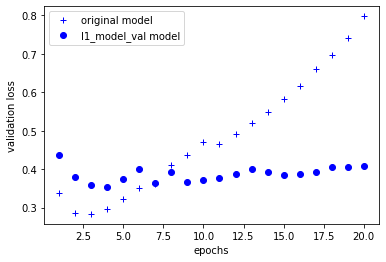

In [ ]:
l1_model_val_loss = l1_model_hist.history['val_loss']

plt.plot(epochs,original_val_loss,'b+',label='original model')
plt.plot(epochs,l1_model_val_loss,'bo',label='l1_model_val model')
plt.xlabel('epochs')
plt.ylabel('validation loss')
plt.legend()
plt.show()

## L1_ L2 규제( L1 = 0.0001, L2= 0.0001)모델과 비교

In [ ]:
l1l2_model = models.Sequential()
l1l2_model.add(layers.Dense(16,kernel_regularizer=regularizers.l1_l2(l1=0.0001,l2=0.0001),
                            activation='relu',input_shape=(10000,)))
l1l2_model.add(layers.Dense(16,kernel_regularizer=regularizers.l1_l2(l1=0.0001,l2=0.0001),
                            activation='relu'))
l1l2_model.add(layers.Dense(1,activation='sigmoid'))
l1l2_model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
l1l2_model_hist = l1l2_model.fit(x_train,y_train,epochs=20,batch_size=512,validation_data=(x_test,y_test))


Epoch 1/20
49/49 [==============================] - 3s 41ms/step - loss: 0.5882 - acc: 0.8089 - val_loss: 0.4602 - val_acc: 0.8704
Epoch 2/20
49/49 [==============================] - 1s 26ms/step - loss: 0.3850 - acc: 0.8946 - val_loss: 0.3748 - val_acc: 0.8887
Epoch 3/20
49/49 [==============================] - 1s 26ms/step - loss: 0.3321 - acc: 0.9085 - val_loss: 0.3644 - val_acc: 0.8830
Epoch 4/20
49/49 [==============================] - 1s 26ms/step - loss: 0.3114 - acc: 0.9132 - val_loss: 0.3561 - val_acc: 0.8870
Epoch 5/20
49/49 [==============================] - 1s 26ms/step - loss: 0.3014 - acc: 0.9176 - val_loss: 0.3765 - val_acc: 0.8780
Epoch 6/20
49/49 [==============================] - 1s 26ms/step - loss: 0.2922 - acc: 0.9213 - val_loss: 0.4222 - val_acc: 0.8596
Epoch 7/20
49/49 [==============================] - 1s 26ms/step - loss: 0.2827 - acc: 0.9249 - val_loss: 0.3817 - val_acc: 0.8770
Epoch 8/20
49/49 [==============================] - 1s 26ms/step - loss: 0.2823 - a

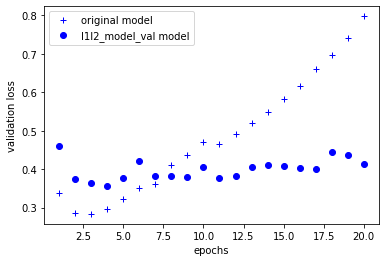

In [ ]:
l1l2_model_val_loss = l1l2_model_hist.history['val_loss']

plt.plot(epochs,original_val_loss,'b+',label='original model')
plt.plot(epochs,l1l2_model_val_loss,'bo',label='l1l2_model_val model')
plt.xlabel('epochs')
plt.ylabel('validation loss')
plt.legend()
plt.show()

## 드롭아웃 추가

> 층의 출력값에 노이즈를 추가하여 중요하지 않은 우연한 패턴을 깨드리는 것 




In [ ]:
#훈련할 때 유닛의 출력 중 50% 를 버림
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16,activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1,activation='sigmoid'))
dpt_model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
dpt_model_hist = dpt_model.fit(x_train,y_train,epochs=20,batch_size=512,validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 3s 43ms/step - loss: 0.6182 - acc: 0.6560 - val_loss: 0.4877 - val_acc: 0.8541
Epoch 2/20
49/49 [==============================] - 1s 25ms/step - loss: 0.4630 - acc: 0.8104 - val_loss: 0.3485 - val_acc: 0.8803
Epoch 3/20
49/49 [==============================] - 2s 38ms/step - loss: 0.3656 - acc: 0.8639 - val_loss: 0.3035 - val_acc: 0.8849
Epoch 4/20
49/49 [==============================] - 2s 35ms/step - loss: 0.3023 - acc: 0.8934 - val_loss: 0.2830 - val_acc: 0.8871
Epoch 5/20
49/49 [==============================] - 1s 26ms/step - loss: 0.2670 - acc: 0.9066 - val_loss: 0.2836 - val_acc: 0.8901
Epoch 6/20
49/49 [==============================] - 2s 32ms/step - loss: 0.2348 - acc: 0.9205 - val_loss: 0.2951 - val_acc: 0.8871
Epoch 7/20
49/49 [==============================] - 2s 33ms/step - loss: 0.2099 - acc: 0.9284 - val_loss: 0.2983 - val_acc: 0.8871
Epoch 8/20
49/49 [==============================] - 1s 31ms/step - loss: 0.1954 - a

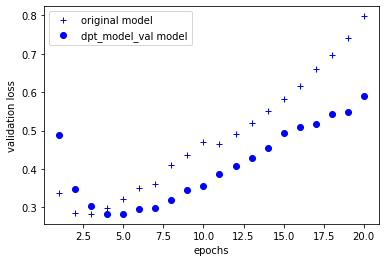

In [ ]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs,original_val_loss,'b+',label='original model')
plt.plot(epochs,dpt_model_val_loss,'bo',label='dpt_model_val model')
plt.xlabel('epochs')
plt.ylabel('validation loss')
plt.legend()
plt.show()

[결론] 신경망에서 과대적합을 방지하기 위해 
- 훈련 데이터 더 모으기
- 네트워크의 용량 감소
- 가중치 규제 추가
- 드롭아웃 추가 